# Exploratory data analysis

## Load data

In [1]:
from parse_data import TextsinlevelsDB

In [2]:
textsinlevels = TextsinlevelsDB(db_name="textsinlevels")
df_news = textsinlevels.write_from_table_to_df("newsinlevels")
df_days = textsinlevels.write_from_table_to_df("daysinlevels")
del textsinlevels

In [3]:
def print_general_info(df):
    print(df.head())
    print()
    print("The number of texts:", df.shape[0])
    print(f"The number of texts for each level:\n{df['level'].value_counts().sort_index()}")

In [4]:
print_general_info(df_news)

               date                                     heading  \
0  15-01-2022 12:00                           Test your English   
1  14-01-2022 15:00  World’s best skater can go to the Olympics   
2  14-01-2022 07:00                        Man with a pig heart   
3  13-01-2022 15:00                         New mirror in space   
4  13-01-2022 07:00                               Hainan towers   

                                        article_text  level  
0  We have a test for students of English. You ca...      1  
1  Erin Jackson is an American athlete. She is th...      1  
2  David Bennet comes from Maryland, US. He is 57...      1  
3  A rocket goes in space two weeks ago. It carri...      1  
4  The Evergrande Group is a Chinese company. It ...      1  

The number of texts: 9817
The number of texts for each level:
1    3273
2    3272
3    3272
Name: level, dtype: int64


In [5]:
print_general_info(df_days)

          date                                            heading  \
0   12-01-2010                   The day the earthquake hit Haiti   
1   10-01-1789      The day of the first US presidential election   
2  10-01-49 BC                 The day Caesar crossed the Rubicon   
3   09-01-1959        The day Fidel Castro took control over Cuba   
4   05-01-1933  The day the Golden Gate Bridge construction st...   

                                        article_text  level  
0  Millions of people live in Haiti. Haiti is a p...      1  
1  It is December 15, 1788. It is time when the e...      1  
2  Two thousand years ago, Rome is a republic. Ro...      1  
3  It is 1956. Fidel Castro wants a revolution in...      1  
4  The Golden Gate Bridge is a symbol of San Fran...      1  

The number of texts: 477
The number of texts for each level:
1    159
2    159
3    159
Name: level, dtype: int64


## Preprocessing

In [6]:
import spacy
from tqdm.notebook import tqdm

In [7]:
def preprocess(dataset, dataset_name, model):
    doc_bin = spacy.tokens.DocBin(store_user_data=False)
    for doc in nlp.pipe(tqdm(dataset["article_text"])):
        doc_bin.add(doc)
    doc_bin.to_disk(dataset_name)

In [8]:
def load_preprocessed_data(dataset_name):
    nlp = spacy.blank("en")
    doc_bin = spacy.tokens.DocBin().from_disk(dataset_name)
    docs = list(doc_bin.get_docs(nlp.vocab))
    return docs

In [9]:
model = "en_core_web_lg"
nlp = spacy.load(model)

In [ ]:
preprocess(dataset=df_news, dataset_name="news", model=model)
preprocess(dataset=df_days, dataset_name="days", model=model)

In [10]:
news = load_preprocessed_data("news")
days = load_preprocessed_data("days")

## Feature Engineering

### Readability

https://github.com/cdimascio/py-readability-metrics

In [81]:
from readability import Readability

In [82]:
flesch_kincaid = []
count = 0

for article in news:
    r = Readability(article.text)
    try:
        flesch_kincaid.append(r.flesch_kincaid().score)
    except:
        count += 1
print(count)

5228


In [83]:
flesch_kincaid = []
count = 0

for article in news:
    r = Readability(article.text)
    try:
        flesch_kincaid.append(r.flesch().score)
    except:
        count += 1
print(count)

5228


In [84]:
flesch = []
count = 0

for article in news:
    r = Readability(article.text)
    try:
        flesch.append(r.flesch().score)
    except:
        count += 1
print(count)

5228


In [85]:
r = Readability(news[0].text)
readability_measures = {"Flesch-Kincaid Grade Level": r.flesch_kincaid().score,
                       "Flesch Reading Ease": r.flesch().score,
                       "Dale-Chall Readability": r.dale_chall().score, 
                       "Automated Readability Index (ARI)": r.ari().score,
                       "Coleman-Liau Index": r.coleman_liau().score,
                       "Gunning-Fog Index": r.gunning_fog().score,
                       "SPACHE": r.spache().score,
                       "Linsear Write": r.linsear_write().score}
for k, v in readability_measures.items():
    print(f"{k}: {v:.2f}")

Flesch-Kincaid Grade Level: 3.83
Flesch Reading Ease: 80.74
Dale-Chall Readability: 7.45
Automated Readability Index (ARI): 2.81
Coleman-Liau Index: 5.82
Gunning-Fog Index: 4.81
SPACHE: 4.29
Linsear Write: 3.39


In [86]:
r = Readability(news[3267].text)
readability_measures = {"Flesch-Kincaid Grade Level": r.flesch_kincaid().score,
                       "Flesch Reading Ease": r.flesch().score,
                       "Dale-Chall Readability": r.dale_chall().score, 
                       "Automated Readability Index (ARI)": r.ari().score,
                       "Coleman-Liau Index": r.coleman_liau().score,
                       "Gunning-Fog Index": r.gunning_fog().score,
                       "SPACHE": r.spache().score,
                       "Linsear Write": r.linsear_write().score}
for k, v in readability_measures.items():
    print(f"{k}: {v:.2f}")

Flesch-Kincaid Grade Level: 7.97
Flesch Reading Ease: 66.98
Dale-Chall Readability: 8.03
Automated Readability Index (ARI): 8.66
Coleman-Liau Index: 9.41
Gunning-Fog Index: 8.73
SPACHE: 5.86
Linsear Write: 10.05


In [87]:
r = Readability(news[3267+3266].text)
readability_measures = {"Flesch-Kincaid Grade Level": r.flesch_kincaid().score,
                       "Flesch Reading Ease": r.flesch().score,
                       "Dale-Chall Readability": r.dale_chall().score, 
                       "Automated Readability Index (ARI)": r.ari().score,
                       "Coleman-Liau Index": r.coleman_liau().score,
                       "Gunning-Fog Index": r.gunning_fog().score,
                       "SPACHE": r.spache().score,
                       "Linsear Write": r.linsear_write().score}
for k, v in readability_measures.items():
    print(f"{k}: {v:.2f}")

Flesch-Kincaid Grade Level: 13.35
Flesch Reading Ease: 38.46
Dale-Chall Readability: 9.78
Automated Readability Index (ARI): 14.33
Coleman-Liau Index: 13.27
Gunning-Fog Index: 13.52
SPACHE: 7.87
Linsear Write: 15.81


## Vocabulary

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def word_counts(dataset):
    text_lens = []
    for text in dataset:
        text_len = 0
        for w in text:
            if w.is_alpha:
                text_len += 1
        text_lens.append(text_len)
    return text_lens

In [13]:
def sentence_counts(dataset):
    text_lens = []
    for text in dataset:
        text_lens.append(len(list(text.sents)))
    return text_lens

In [14]:
def counts_info(dataset, dataset_name):
    print(dataset_name)
    d = {"Number of words": pd.Series(word_counts(dataset)),
        "Number of sentences": pd.Series(sentence_counts(dataset))}
    df_stats = pd.DataFrame(d)
    print(df_stats.describe())
    
    for col in d:
        ax = sns.boxplot(x=df_stats[col])
        plt.show()
    
    return df_stats

newsinlevels
       Number of words  Number of sentences
count      9817.000000          9817.000000
mean         99.316594             8.588367
std          40.136460             3.784480
min          20.000000             1.000000
25%          70.000000             6.000000
50%          94.000000             8.000000
75%         121.000000            11.000000
max         484.000000            44.000000


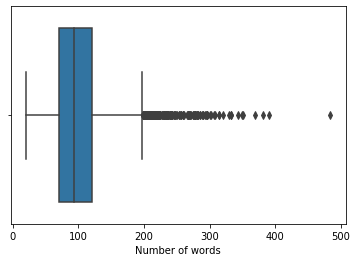

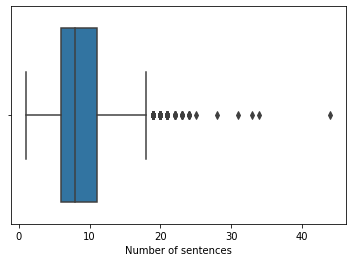

In [15]:
news_count_stats = counts_info(news, "newsinlevels")

daysinlevels
       Number of words  Number of sentences
count       477.000000           477.000000
mean        159.280922            16.020964
std          46.060390             5.171795
min          58.000000             6.000000
25%         126.000000            12.000000
50%         155.000000            15.000000
75%         186.000000            19.000000
max         323.000000            41.000000


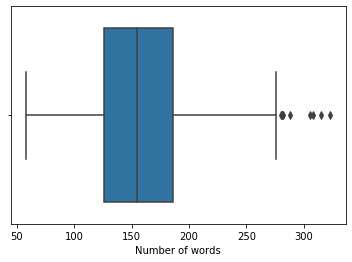

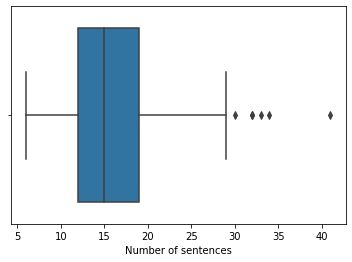

In [16]:
days_count_stats = counts_info(days, "daysinlevels")